In [2]:
import pandas as pd
import numpy as np

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-06 22:54:13--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.2’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.1s    

2025-10-06 22:54:13 (7.12 MB/s) - ‘car_fuel_efficiency.csv.2’ saved [874188/874188]



In [78]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [79]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [6]:
# Check missing values
missing_columns_count = df.isnull().sum()
missing_columns_count

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [7]:
# Median horsepower
median_hp = df['horsepower'].median()
median_hp


149.0

In [72]:
# Prepare and split dataset
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)



In [73]:
len(df_train), len(df_val), len(df_test), len(df_train + df_val + df_test)


(5824, 1940, 1940, 5824)

In [16]:
y_train = np.log1p(df_train['fuel_efficiency_mpg'].values)
y_val = np.log1p(df_val['fuel_efficiency_mpg'].values)
y_test = np.log1p(df_test['fuel_efficiency_mpg'].values)
y_train, y_val, y_test

(array([2.8703359 , 2.85061269, 2.97511223, ..., 2.92279789, 2.99201277,
        2.94261017]),
 array([2.79522685, 2.74734667, 2.58377354, ..., 2.68192023, 2.69011317,
        2.82233377]),
 array([2.82163803, 2.72604557, 2.54540897, ..., 2.96550163, 3.06816735,
        2.88011043]))

In [28]:
# Fill with 0
df_train_zero = df_train.copy()
df_val_zero = df_val.copy()
df_test_zero = df_test.copy()

df_train_zero['horsepower'] = df_train_zero['horsepower'].fillna(0)
df_val_zero['horsepower'] = df_val_zero['horsepower'].fillna(0)
df_test_zero['horsepower'] = df_test_zero['horsepower'].fillna(0)


In [50]:
# Fill with mean
mean_hp = df_train['horsepower'].mean()

df_train_mean = df_train.copy()
df_val_mean = df_val.copy()
df_test_mean = df_test.copy()

df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(mean_hp)
df_val_mean['horsepower'] = df_val_mean['horsepower'].fillna(mean_hp)
df_test_mean['horsepower'] = df_test_mean['horsepower'].fillna(mean_hp)


In [33]:
# Linear regression
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
X_train_zero = df_train_zero[features].values
X_val_zero = df_val_zero[features].values
X_test_zero = df_test_zero[features].values
X_train_zero, X_val_zero, X_test_zero

(array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
        [ 160.        ,  141.        , 2741.17048439, 2019.        ],
        [ 230.        ,  155.        , 2471.88023726, 2017.        ],
        ...,
        [ 210.        ,  152.        , 2500.17568746, 2020.        ],
        [ 250.        ,  154.        , 2254.31324473, 2002.        ],
        [ 210.        ,  152.        , 2435.20360628, 2004.        ]]),
 array([[ 180.        ,  112.        , 2772.13441008, 2020.        ],
        [ 260.        ,  138.        , 3014.06152983, 2022.        ],
        [ 140.        ,  181.        , 3652.18615117, 2016.        ],
        ...,
        [ 230.        ,  202.        , 3303.00068812, 2008.        ],
        [ 220.        ,  169.        , 3293.42025107, 2008.        ],
        [ 200.        ,  117.        , 2692.7812918 , 2004.        ]]),
 array([[ 140.        ,  148.        , 2704.82600507, 2017.        ],
        [ 210.        ,  136.        , 3001.22749027, 2004. 

In [51]:
# Linear regression
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
X_train_mean = df_train_mean[features].values
X_val_mean = df_val_mean[features].values
X_test_mean = df_test_mean[features].values
X_train_mean, X_val_mean, X_test_mean

(array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
        [ 160.        ,  141.        , 2741.17048439, 2019.        ],
        [ 230.        ,  155.        , 2471.88023726, 2017.        ],
        ...,
        [ 210.        ,  152.        , 2500.17568746, 2020.        ],
        [ 250.        ,  154.        , 2254.31324473, 2002.        ],
        [ 210.        ,  152.        , 2435.20360628, 2004.        ]]),
 array([[ 180.        ,  112.        , 2772.13441008, 2020.        ],
        [ 260.        ,  138.        , 3014.06152983, 2022.        ],
        [ 140.        ,  181.        , 3652.18615117, 2016.        ],
        ...,
        [ 230.        ,  202.        , 3303.00068812, 2008.        ],
        [ 220.        ,  169.        , 3293.42025107, 2008.        ],
        [ 200.        ,  117.        , 2692.7812918 , 2004.        ]]),
 array([[ 140.        ,  148.        , 2704.82600507, 2017.        ],
        [ 210.        ,  136.        , 3001.22749027, 2004. 

In [35]:
y_train_zero = np.log1p(df_train_zero['fuel_efficiency_mpg'].values)
y_val_zero = np.log1p(df_val_zero['fuel_efficiency_mpg'].values)
y_test_zero = np.log1p(df_test_zero['fuel_efficiency_mpg'].values)
y_train_zero, y_val_zero, y_test_zero

(array([2.8703359 , 2.85061269, 2.97511223, ..., 2.92279789, 2.99201277,
        2.94261017]),
 array([2.79522685, 2.74734667, 2.58377354, ..., 2.68192023, 2.69011317,
        2.82233377]),
 array([2.82163803, 2.72604557, 2.54540897, ..., 2.96550163, 3.06816735,
        2.88011043]))

In [52]:
y_train_mean = np.log1p(df_train_mean['fuel_efficiency_mpg'].values)
y_val_mean = np.log1p(df_val_mean['fuel_efficiency_mpg'].values)
y_test_mean = np.log1p(df_test_mean['fuel_efficiency_mpg'].values)
y_train_mean, y_val_mean, y_test_mean

(array([2.8703359 , 2.85061269, 2.97511223, ..., 2.92279789, 2.99201277,
        2.94261017]),
 array([2.79522685, 2.74734667, 2.58377354, ..., 2.68192023, 2.69011317,
        2.82233377]),
 array([2.82163803, 2.72604557, 2.54540897, ..., 2.96550163, 3.06816735,
        2.88011043]))

In [36]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

    
def linear_regression(xi):
    return w0 + dot(xi, w)


def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [37]:
w0, w = train_linear_regression(X_train_zero, y_train_zero)
w0

np.float64(3.6646662473557985)

In [53]:
w0, w = train_linear_regression(X_train_mean, y_train_mean)
w0

np.float64(3.6710008196454234)

In [43]:
y_pred_zero = w0 + X_train_zero.dot(w)
y_pred_zero

array([2.90981589, 2.84278709, 2.93310627, ..., 2.92329662, 3.00305539,
       2.94404905])

In [54]:
y_pred_mean = w0 + X_train_mean.dot(w)
y_pred_mean

array([2.90493466, 2.83614915, 2.93281288, ..., 2.92153243, 3.00286793,
       2.94287685])

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: ylabel='Count'>

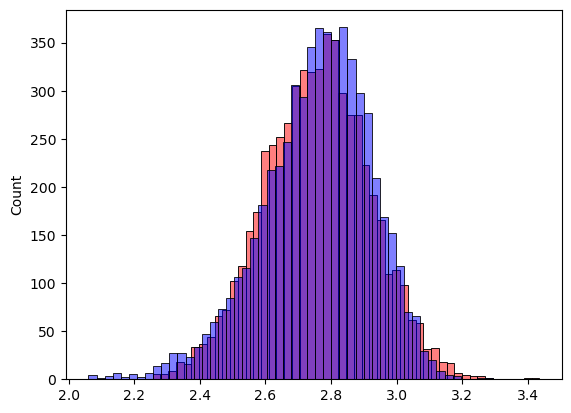

In [44]:
sns.histplot(y_pred_zero, color='red', alpha=0.5, bins=50)
sns.histplot(y_train_zero, color='blue', alpha=0.5, bins=50)

<Axes: ylabel='Count'>

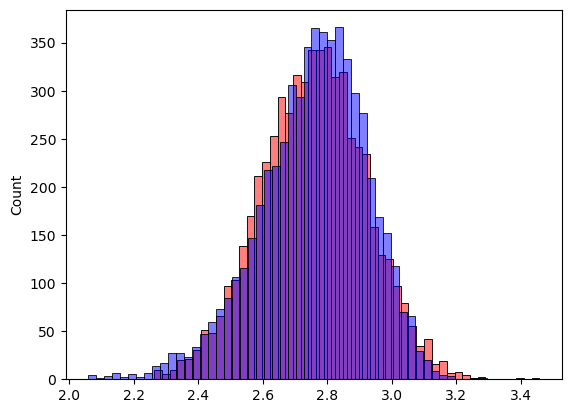

In [55]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=50)
sns.histplot(y_train_mean, color='blue', alpha=0.5, bins=50)

In [45]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [47]:
round(rmse(y_train_zero, y_pred_zero), 2)

np.float64(0.04)

In [56]:
round(rmse(y_train_mean, y_pred_mean), 2)

np.float64(0.04)

In [57]:
# Regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [64]:
array_of_r = [0, 0.01, 1, 10, 100]

rmse_values = {}

for r in array_of_r:
    w0, w = train_linear_regression_reg(X_train_zero, y_train_zero, r)
    
    y_pred_zero = w0 + X_val_zero.dot(w)
    rmse_values[r] = round(rmse(y_val_zero, y_pred_zero), 2)

rmse_values

{0: np.float64(0.04),
 0.01: np.float64(0.04),
 1: np.float64(0.04),
 10: np.float64(0.04),
 100: np.float64(0.04)}

In [82]:
# Question 5
seeds = list(range(10))
seeds

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [83]:

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)

In [84]:

features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
rmse_scores = []

for s in seeds: 
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train_2 = df.iloc[idx[:n_train]]
    df_val_2 = df.iloc[idx[n_train:n_train+n_val]]
    df_test_2 = df.iloc[idx[n_train+n_val:]]

    df_train_2.loc[:, 'horsepower'] = df_train_2['horsepower'].fillna(0)
    df_val_2.loc[:, 'horsepower'] = df_val_2['horsepower'].fillna(0)
    df_test_2.loc[:, 'horsepower'] = df_test_2['horsepower'].fillna(0)
    
    df_train_2 = df_train_2.reset_index(drop=True)
    df_val_2 = df_val_2.reset_index(drop=True)
    df_test_2 = df_test_2.reset_index(drop=True)

    X_train_2 = df_train_2[features].values
    y_train_2 = df_train_2['fuel_efficiency_mpg'].values
    X_val_2 = df_val_2[features].values
    y_val_2 = df_val_2['fuel_efficiency_mpg'].values

    w0, w = train_linear_regression(X_train_2, y_train_2)

    y_pred = w0 + X_train_2.dot(w)

    rmse_val = round(rmse(y_train_2, y_pred), 3)
    rmse_scores.append(rmse_val)

# Get value of std
std_rmse = round(np.std(rmse_scores), 3)
std_rmse

np.float64(0.003)

In [87]:
# Question 6
np.random.seed(9)
np.random.shuffle(idx)

df_train_3 = df.iloc[idx[:n_train]]
df_val_3 = df.iloc[idx[n_train:n_train+n_val]]
df_test_3 = df.iloc[idx[n_train+n_val:]]

df_train_3.loc[:, 'horsepower'] = df_train_3['horsepower'].fillna(0)
df_val_3.loc[:, 'horsepower'] = df_val_3['horsepower'].fillna(0)
df_test_3.loc[:, 'horsepower'] = df_test_3['horsepower'].fillna(0)

df_train_3 = df_train_3.reset_index(drop=True)
df_val_3 = df_val_3.reset_index(drop=True)
df_test_3 = df_test_3.reset_index(drop=True)


df_full_train = pd.concat([df_train_3, df_val_3]).reset_index(drop=True)
df_full_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,163.0,2596.181383,2000,16.826595
1,130,123.0,3798.823171,2007,11.098491
2,190,210.0,3490.058283,2022,13.320370
3,240,188.0,3484.471854,2006,13.562769
4,190,168.0,3629.219477,2013,12.269049
...,...,...,...,...,...
7759,220,136.0,2471.042074,2022,17.576885
7760,190,123.0,3182.704176,2001,14.123574
7761,260,197.0,3024.782792,2006,15.737792
7762,130,0.0,2713.375132,2020,15.814211


In [91]:
X_full_train = df_full_train[features].values
X_test_3 = df_test_3[features].values

Y_full_train = np.log1p(df_full_train['fuel_efficiency_mpg'].values)
Y_test_3 = np.log1p(df_test_3['fuel_efficiency_mpg'].values)

In [94]:
w0, w = train_linear_regression_reg(X_full_train, Y_full_train, r=0.001)
    
y_pred_full = w0 + X_test_3.dot(w)
round(rmse(Y_test_3, y_pred_full), 2)

np.float64(0.04)